(array([ 8400,  8600,  8800,  9000,  9200,  9400,  9600,  9800, 10000,
       10200, 10500, 10600, 10700]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))
(array([ 9700,  9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200,
       11400, 11600, 11800, 11900, 12000, 12200]), array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]))
(array([10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800,
       12000, 12200, 12400, 12600, 12800, 13000]), array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]))
(array([10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200,
       12400, 12600, 12800, 13000, 13200, 13400]), array([40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]))


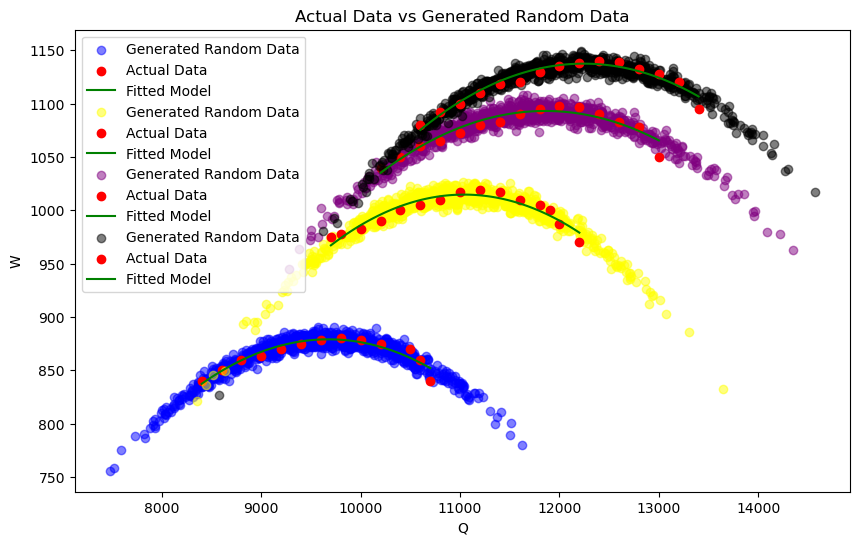

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. 주어진 데이터
Q10 = np.array([8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10500, 10600, 10700])
Q20 = np.array([9700, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 11900, 12000, 12200])
Q30 = np.array([10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000])
Q40 = np.array([10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400])


W10 = np.array([840, 850, 860, 863, 870, 875, 878, 880, 878, 875, 870, 860, 840])
W20 = np.array([975, 978, 982, 990, 1000, 1005, 1010, 1017, 1019, 1017, 1010, 1005, 1000, 987, 970])
W30 = np.array([1040, 1050, 1060, 1065, 1072, 1080, 1083, 1090, 1095, 1098, 1097, 1090, 1083, 1078, 1050])
W40 = np.array([1080, 1092, 1100, 1110, 1118, 1120, 1130, 1135, 1138, 1140, 1139, 1132, 1128, 1120, 1095])

plt.figure(figsize=(10, 6))

# 2. Q와 W의 관계식 도출 (피팅)
def poly_func(X, a, b, c, d, e, f):
    x, y = X
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f



def makedots(Q, W_actual, igv, clr):
    
    angle = []
    for i in Q:
        angle.append(igv)
    angle = np.array(angle)
    
    print((Q,angle))
    
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(poly_func, (Q,angle), W_actual)
    a, b, c, d, e, f= params
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 1000
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    for i in Q_random:
        angleList.append(igv)
    angleList = np.array(angleList)
    
    
    W_random = poly_func((Q_random, angleList), a, b, c, d, e, f) + np.random.normal(0, np.std(W_actual - poly_func((Q,angle),a, b, c, d, e, f)), num_samples)
    
    # 4. 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(Q_random, W_random, label='Generated Random Data', color=clr, alpha=0.5)
    plt.scatter(Q, W_actual, label='Actual Data', color="red")
    Q_fit = np.linspace(min(Q), max(Q), 100)
    
    angleList = []
    for i in Q_fit:
        angleList.append(igv)
        
    angleList = np.array(angleList)
    W_fit = poly_func((Q_fit, angleList), a, b, c, d, e, f)
    plt.plot(Q_fit, W_fit, label=f'Fitted Model', color='green')


makedots(Q10, W10, 10, "blue")
makedots(Q20, W20, 20, "yellow")
makedots(Q30, W30, 30, "purple")
makedots(Q40, W40, 40, "black")


plt.xlabel('Q')
plt.ylabel('W')
plt.legend()
plt.title('Actual Data vs Generated Random Data')
plt.show()


(array([ 8400,  8600,  8800,  9000,  9200,  9400,  9600,  9800, 10000,
       10200, 10400, 10600, 10700]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))
(array([ 9700,  9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200,
       11400, 11600, 11800, 11900, 12000, 12200]), array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]))
(array([10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800,
       12000, 12200, 12400, 12600, 12800, 13000]), array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]))
(array([10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200,
       12400, 12600, 12800, 13000, 13200, 13400]), array([40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]))


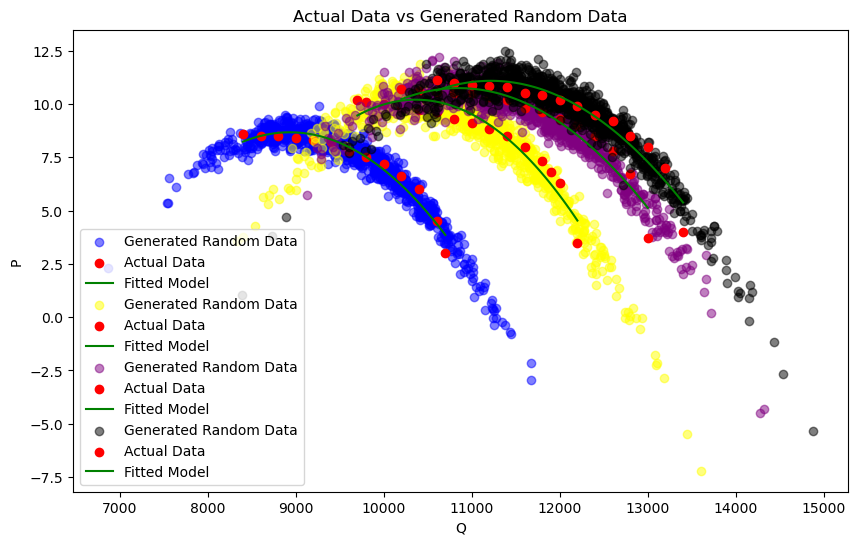

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. 주어진 데이터
Q10 = np.array([8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10700])
Q20 = np.array([9700, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 11900, 12000, 12200])
Q30 = np.array([10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000])
Q40 = np.array([10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400])


P10 = np.array([8.6, 8.5, 8.5, 8.4, 8.3, 8.2, 7.8, 7.5, 7.2, 6.6, 6.0, 4.5, 3.0])
P20 = np.array([10.2, 10.1, 10.0, 9.8, 9.7, 9.6, 9.3, 9.1, 8.8, 8.5, 8.0, 7.3, 6.8, 6.3, 3.5])
P30 = np.array([10.7, 10.6, 10.55, 10.5, 10.5, 10.3, 10.2, 9.8, 9.6, 9.3, 9.0, 8.5, 7.8, 6.7, 3.7])
P40 = np.array([11.1, 11.0, 10.9, 10.85, 10.8, 10.5, 10.4, 10.2, 9.9, 9.5, 9.2, 8.5, 8.0, 7.0, 4.0])

plt.figure(figsize=(10, 6))

# 2. Q와 W의 관계식 도출 (피팅)
def poly_func(X, a, b, c, d, e, f):
    x, y = X
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f



def makedots(Q, W_actual, igv, clr):
    
    angle = []
    for i in Q:
        angle.append(igv)
    angle = np.array(angle)
    
    print((Q,angle))
    
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(poly_func, (Q,angle), W_actual)
    a, b, c, d, e, f= params
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 1000
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    for i in Q_random:
        angleList.append(igv)
    angleList = np.array(angleList)
    
    
    W_random = poly_func((Q_random, angleList), a, b, c, d, e, f) + np.random.normal(0, np.std(W_actual - poly_func((Q,angle),a, b, c, d, e, f)), num_samples)
    
    # 4. 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(Q_random, W_random, label='Generated Random Data', color=clr, alpha=0.5)
    plt.scatter(Q, W_actual, label='Actual Data', color="red")
    Q_fit = np.linspace(min(Q), max(Q), 100)
    
    angleList = []
    for i in Q_fit:
        angleList.append(igv)
        
    angleList = np.array(angleList)
    W_fit = poly_func((Q_fit, angleList), a, b, c, d, e, f)
    plt.plot(Q_fit, W_fit, label=f'Fitted Model', color='green')


makedots(Q10, P10, 10, "blue")
makedots(Q20, P20, 20, "yellow")
makedots(Q30, P30, 30, "purple")
makedots(Q40, P40, 40, "black")


plt.xlabel('Q')
plt.ylabel('P')
plt.legend()
plt.title('Actual Data vs Generated Random Data')
plt.show()


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Q10 = np.array([8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10700])
Q20 = np.array([9700, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 11900, 12000, 12200])
Q30 = np.array([10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000])
Q40 = np.array([10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400])

W10 = np.array([840, 850, 860, 863, 870, 875, 878, 880, 878, 875, 870, 860, 840])
W20 = np.array([975, 978, 982, 990, 1000, 1005, 1010, 1017, 1019, 1017, 1010, 1005, 1000, 987, 970])
W30 = np.array([1040, 1050, 1060, 1065, 1072, 1080, 1083, 1090, 1095, 1098, 1097, 1090, 1083, 1078, 1050])
W40 = np.array([1080, 1092, 1100, 1110, 1118, 1120, 1130, 1135, 1138, 1140, 1139, 1132, 1128, 1120, 1095])

P10 = np.array([8.6, 8.5, 8.5, 8.4, 8.3, 8.2, 7.8, 7.5, 7.2, 6.6, 6.0, 4.5, 3.0])
P20 = np.array([10.2, 10.1, 10.0, 9.8, 9.7, 9.6, 9.3, 9.1, 8.8, 8.5, 8.0, 7.3, 6.8, 6.3, 3.5])
P30 = np.array([10.7, 10.6, 10.55, 10.5, 10.5, 10.3, 10.2, 9.8, 9.6, 9.3, 9.0, 8.5, 7.8, 6.7, 3.7])
P40 = np.array([11.1, 11.0, 10.9, 10.85, 10.8, 10.5, 10.4, 10.2, 9.9, 9.5, 9.2, 8.5, 8.0, 7.0, 4.0])

def generate_2list_with_x(input_list, input_list2, x):
    result = [[item, item2, x] for item, item2 in zip(input_list, input_list2)]
    return result

def generate_3list(input_list, input_list2, input_list3):
    result = [[item, item2, item3] for item, item2, item3 in zip(input_list, input_list2, input_list3)]
    return result
    
def generate_list_with_x(input_list, x):
    result = [[item, x] for item in input_list]
    return result

def merge_and_sort_lists(*lists):
    # 여러 리스트를 하나로 합치기
    merged_list = []
    for lst in lists:
        merged_list.extend(lst)
    
    # 합친 리스트 정렬하기
    merged_list.sort()
    
    return merged_list

In [59]:
add10 = generate_list_with_x(Q10, 10)
add20 = generate_list_with_x(Q20, 20)
add30 = generate_list_with_x(Q30, 30)
add40 = generate_list_with_x(Q40, 40)

ml = merge_and_sort_lists(add10, add20, add30, add40)

print(ml)

[[8400, 10], [8600, 10], [8800, 10], [9000, 10], [9200, 10], [9400, 10], [9600, 10], [9700, 20], [9800, 10], [9800, 20], [10000, 10], [10000, 20], [10200, 10], [10200, 20], [10200, 30], [10400, 10], [10400, 20], [10400, 30], [10600, 10], [10600, 20], [10600, 30], [10600, 40], [10700, 10], [10800, 20], [10800, 30], [10800, 40], [11000, 20], [11000, 30], [11000, 40], [11200, 20], [11200, 30], [11200, 40], [11400, 20], [11400, 30], [11400, 40], [11600, 20], [11600, 30], [11600, 40], [11800, 20], [11800, 30], [11800, 40], [11900, 20], [12000, 20], [12000, 30], [12000, 40], [12200, 20], [12200, 30], [12200, 40], [12400, 30], [12400, 40], [12600, 30], [12600, 40], [12800, 30], [12800, 40], [13000, 30], [13000, 40], [13200, 40], [13400, 40]]


In [60]:
# 2. Q와 W의 관계식 도출 (피팅)
def poly_func(X, a, b, c, d, e, f):
    x, y = X
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f

def mono_func(x, a, b):
    return a * x + b 

(array([ 8400,  8600,  8800,  9000,  9200,  9400,  9600,  9700,  9800,
        9800, 10000, 10000, 10200, 10200, 10200, 10400, 10400, 10400,
       10600, 10600, 10600, 10600, 10700, 10800, 10800, 10800, 11000,
       11000, 11000, 11200, 11200, 11200, 11400, 11400, 11400, 11600,
       11600, 11600, 11800, 11800, 11800, 11900, 12000, 12000, 12000,
       12200, 12200, 12200, 12400, 12400, 12600, 12600, 12800, 12800,
       13000, 13000, 13200, 13400]), array([10, 10, 10, 10, 10, 10, 10, 20, 10, 20, 10, 20, 10, 20, 30, 10, 20,
       30, 10, 20, 30, 40, 10, 20, 30, 40, 20, 30, 40, 20, 30, 40, 20, 30,
       40, 20, 30, 40, 20, 30, 40, 20, 20, 30, 40, 20, 30, 40, 30, 40, 30,
       40, 30, 40, 30, 40, 40, 40]))


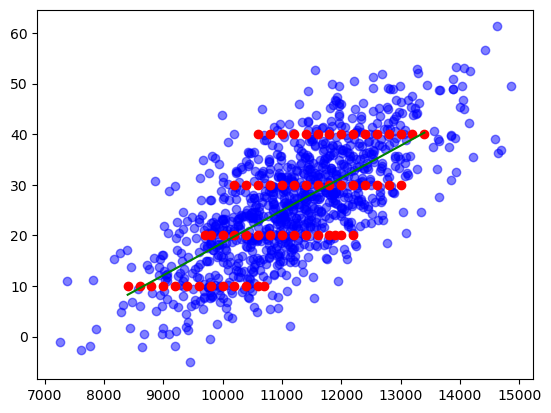

In [72]:
def makeI(ml):
    
    Q = np.array(ml[:,0])
    I = np.array(ml[:,1])
    
    print((Q,I))
    
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(mono_func, Q, I)
    a, b = params
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 1000
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
       
    I_random = mono_func(Q_random, a, b) + np.random.normal(0, np.std(I - mono_func(Q, a, b)), num_samples)
    
    # 4. 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(Q_random, I_random, label='Generated Random Data', color="blue", alpha=0.5)
    plt.scatter(Q, I, label='Actual Data', color="red")
    Q_fit = np.linspace(min(Q), max(Q), 100)
    I_fit = mono_func(Q_fit, a, b)
    plt.plot(Q_fit, I_fit, label=f'Fitted Model', color='green')
    return a, b, np.std(I - mono_func(Q, a, b))
         
mIa, mIb, rand  = makeI(np.array(ml))

(array([10, 10, 10, 10, 10, 10, 10, 20, 10, 20, 10, 20, 10, 20, 30, 10, 20,
       30, 10, 20, 30, 40, 10, 20, 30, 40, 20, 30, 40, 20, 30, 40, 20, 30,
       40, 20, 30, 40, 20, 30, 40, 20, 20, 30, 40, 20, 30, 40, 30, 40, 30,
       40, 30, 40, 30, 40, 40, 40]), array([ 8400,  8600,  8800,  9000,  9200,  9400,  9600,  9700,  9800,
        9800, 10000, 10000, 10200, 10200, 10200, 10400, 10400, 10400,
       10600, 10600, 10600, 10600, 10700, 10800, 10800, 10800, 11000,
       11000, 11000, 11200, 11200, 11200, 11400, 11400, 11400, 11600,
       11600, 11600, 11800, 11800, 11800, 11900, 12000, 12000, 12000,
       12200, 12200, 12200, 12400, 12400, 12600, 12600, 12800, 12800,
       13000, 13000, 13200, 13400]))


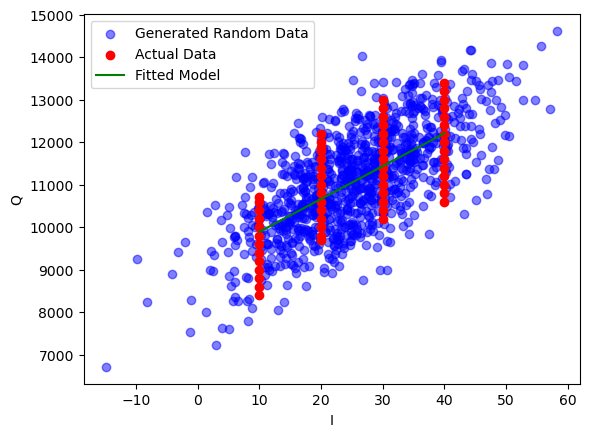

In [73]:
def makeQ(ml):
    
    Q = np.array(ml[:,0])
    I = np.array(ml[:,1])
    
    print((I, Q))
    
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(mono_func, I, Q)
    a, b = params
    
    # 관계식을 바탕으로 난수 생성
    num_samples = 1000
    I_random = np.random.normal(np.mean(I), np.std(I), num_samples)
    Q_random = mono_func(I_random, a, b) + np.random.normal(0, np.std(Q - mono_func(I, a, b)), num_samples)
    
    # 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(I_random, Q_random, label='Generated Random Data', color="blue", alpha=0.5)
    plt.scatter(I, Q, label='Actual Data', color="red")
    I_fit = np.linspace(min(I), max(I), 100)
    Q_fit = mono_func(I_fit, a, b)
    plt.plot(I_fit, Q_fit, label=f'Fitted Model', color='green')
    plt.xlabel('I')
    plt.ylabel('Q')
    plt.legend()
    plt.show()
    
    return a, b, np.std(Q - mono_func(I, a, b))
         
mQa, mQb, rand  = makeQ(np.array(ml))

In [74]:
# I 값을 생성하는 함수 정의
def generate_I(Q):
    try:
        len(Q)
        return mono_func(Q, mIa, mIb) + np.random.normal(0, rand, len(Q))
    except TypeError:
        return mono_func(Q, mIa, mIb) + np.random.normal(0, rand)

print(generate_I(12000))

36.939827489051


In [75]:
# I 값을 생성하는 함수 정의
def generate_Q(I):
    try:
        len(I)
        return mono_func(I, mQa, mQb) + np.random.normal(0, rand, len(Q))
    except TypeError:
        return mono_func(I, mQa, mQb) + np.random.normal(0, rand)

print(generate_Q(22))

10602.454133722713


In [34]:
Qlist = merge_and_sort_lists(Q10, Q20, Q30, Q40)
Ilist = generate_I(np.array(Qlist))

I10 = generate_I(np.array(Q10))
print(I10)

[ 4.89526605  6.67279024 21.81619916 18.96807572 26.97219632  1.77555933
 22.26205941  8.26611643 29.61896032 22.97904188 38.11798276 24.71990399
 33.79011189]


In [77]:
add10 = generate_3list(Q10, W10, generate_I(np.array(Q10)))
add20 = generate_3list(Q20, W20, generate_I(np.array(Q20)))
add30 = generate_3list(Q30, W30, generate_I(np.array(Q30)))
add40 = generate_3list(Q40, W40, generate_I(np.array(Q40)))

ml = merge_and_sort_lists(add10, add20, add30, add40)

print(ml)

[[8400, 840, 730.9811953942627], [8600, 850, -641.8399704899315], [8800, 860, 1287.3304184440676], [9000, 863, 687.6744814031754], [9200, 870, -101.89634306767525], [9400, 875, 62.582752215217205], [9600, 878, -847.674674199486], [9700, 975, 632.743163955072], [9800, 880, 533.3469959202165], [9800, 978, -2073.2721723289524], [10000, 878, 306.7465731079242], [10000, 982, 3137.1094725807043], [10200, 875, -703.7020860346952], [10200, 990, 831.6496128145063], [10200, 1040, 485.3373650700979], [10400, 870, -773.2752617068965], [10400, 1000, -205.8905575183865], [10400, 1050, -974.4551260086342], [10600, 860, -1047.5641910212555], [10600, 1005, -580.0417706626256], [10600, 1060, 149.64278285351287], [10600, 1080, 1074.3501233581492], [10700, 840, 329.63904073839007], [10800, 1010, -400.30591406372827], [10800, 1065, 1277.250241159516], [10800, 1092, 170.41941014971786], [11000, 1017, -35.81655435385373], [11000, 1072, 1008.6948373085568], [11000, 1100, -208.84262836249707], [11200, 1019, 22

(array([ 8400.,  8600.,  8800.,  9000.,  9200.,  9400.,  9600.,  9700.,
        9800.,  9800., 10000., 10000., 10200., 10200., 10200., 10400.,
       10400., 10400., 10600., 10600., 10600., 10600., 10700., 10800.,
       10800., 10800., 11000., 11000., 11000., 11200., 11200., 11200.,
       11400., 11400., 11400., 11600., 11600., 11600., 11800., 11800.,
       11800., 11900., 12000., 12000., 12000., 12200., 12200., 12200.,
       12400., 12400., 12600., 12600., 12800., 12800., 13000., 13000.,
       13200., 13400.]), array([  730.98119539,  -641.83997049,  1287.33041844,   687.6744814 ,
        -101.89634307,    62.58275222,  -847.6746742 ,   632.74316396,
         533.34699592, -2073.27217233,   306.74657311,  3137.10947258,
        -703.70208603,   831.64961281,   485.33736507,  -773.27526171,
        -205.89055752,  -974.45512601, -1047.56419102,  -580.04177066,
         149.64278285,  1074.35012336,   329.63904074,  -400.30591406,
        1277.25024116,   170.41941015,   -35.816554

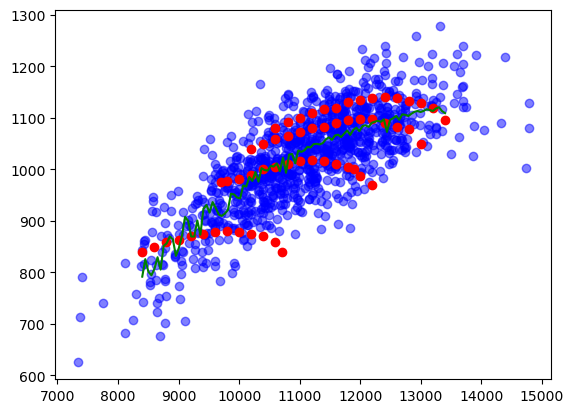

In [78]:
def makedots(ml):
    
    Q = np.array(ml[:,0])
    W = np.array(ml[:,1])
    angle = np.array(ml[:,2])
    
    print((Q,angle))
    
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(poly_func, (Q,angle), W)
    a, b, c, d, e, f= params
    
    num_samples = 1000
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    angleList = generate_I(Q_random)
    angleList = np.array(angleList)
    
    
    W_random = poly_func((Q_random, angleList), a, b, c, d, e, f) + np.random.normal(0, np.std(W - poly_func((Q,angle),a, b, c, d, e, f)), num_samples)
    
    # 4. 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(Q_random, W_random, label='Generated Random Data', color="blue", alpha=0.5)
    plt.scatter(Q, W, label='Actual Data', color="red")
    Q_fit = np.linspace(min(Q), max(Q), 100)
    
    angleList = []
    for i in Q_fit:
        angleList.append(generate_I(i))
        
    angleList = np.array(angleList)
    W_fit = poly_func((Q_fit, angleList), a, b, c, d, e, f)
    plt.plot(Q_fit, W_fit, label=f'Fitted Model', color='green')
    return a, b, c, d, e, f, np.std(W - poly_func((Q,angle),a, b, c, d, e, f))


mWa, mWb, mWc, mWd, mWe, mWf, rand = makedots(np.array(ml))

In [37]:
# I 값을 생성하는 함수 정의
def generate_W(Q, I):
    try:
        len(Q)
        return poly_func((Q, I), mWa, mWb, mWc, mWd, mWe, mWf) + np.random.normal(0, rand, len(Q))
    except TypeError:
        return poly_func((Q, I), mWa, mWb, mWc, mWd, mWe, mWf) + np.random.normal(0, rand, 1)
        
print(generate_W(12000,generate_I(12000)))

[1084.35161683]


In [41]:
add10 = generate_2list_with_x(Q10, P10, 10)
add20 = generate_2list_with_x(Q20, P20, 20)
add30 = generate_2list_with_x(Q30, P30, 30)
add40 = generate_2list_with_x(Q40, P40, 40)

ml = merge_and_sort_lists(add10, add20, add30, add40)

print(ml)

[[8400, 8.6, 10], [8600, 8.5, 10], [8800, 8.5, 10], [9000, 8.4, 10], [9200, 8.3, 10], [9400, 8.2, 10], [9600, 7.8, 10], [9700, 10.2, 20], [9800, 7.5, 10], [9800, 10.1, 20], [10000, 7.2, 10], [10000, 10.0, 20], [10200, 6.6, 10], [10200, 9.8, 20], [10200, 10.7, 30], [10400, 6.0, 10], [10400, 9.7, 20], [10400, 10.6, 30], [10600, 4.5, 10], [10600, 9.6, 20], [10600, 10.55, 30], [10600, 11.1, 40], [10700, 3.0, 10], [10800, 9.3, 20], [10800, 10.5, 30], [10800, 11.0, 40], [11000, 9.1, 20], [11000, 10.5, 30], [11000, 10.9, 40], [11200, 8.8, 20], [11200, 10.3, 30], [11200, 10.85, 40], [11400, 8.5, 20], [11400, 10.2, 30], [11400, 10.8, 40], [11600, 8.0, 20], [11600, 9.8, 30], [11600, 10.5, 40], [11800, 7.3, 20], [11800, 9.6, 30], [11800, 10.4, 40], [11900, 6.8, 20], [12000, 6.3, 20], [12000, 9.3, 30], [12000, 10.2, 40], [12200, 3.5, 20], [12200, 9.0, 30], [12200, 9.9, 40], [12400, 8.5, 30], [12400, 9.5, 40], [12600, 7.8, 30], [12600, 9.2, 40], [12800, 6.7, 30], [12800, 8.5, 40], [13000, 3.7, 30],

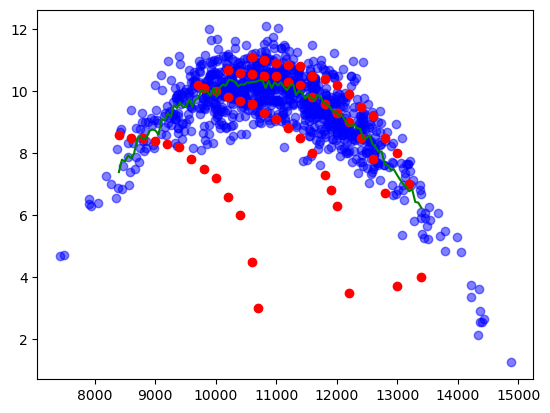

In [52]:
def makedots(ml):
    
    Q = np.array(ml[:,0])
    P = np.array(ml[:,1])
    angle = np.array(ml[:,2])
        
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(poly_func, (Q,angle), P)
    a, b, c, d, e, f= params
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 1000
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    angleList = generate_I(Q_random)
    angleList = np.array(angleList)
    
    P_random = poly_func((Q_random, angleList), a, b, c, d, e, f) + np.random.normal(0, np.std(P - poly_func((Q,angle),a, b, c, d, e, f)), num_samples)
    
    # 4. 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(Q_random, P_random, label='Generated Random Data', color="blue", alpha=0.5)
    plt.scatter(Q, P, label='Actual Data', color="red")
    Q_fit = np.linspace(min(Q), max(Q), 100)
    angleList=generate_I(Q_fit)
    angleList = np.array(angleList)
    P_fit = poly_func((Q_fit, angleList), a, b, c, d, e, f)
    plt.plot(Q_fit, P_fit, label=f'Fitted Model', color='green')
    return a, b, c, d, e, f, np.std(P - poly_func((Q,angle),a, b, c, d, e, f))


mPa, mPb, mPc, mPd, mPe, mPf, rand = makedots(np.array(ml))

In [44]:
# I 값을 생성하는 함수 정의
def generate_P(Q, I):
    try:
        len(Q)
        return poly_func((Q, I), mPa, mPb, mPc, mPd, mPe, mPf) + np.random.normal(0, rand, len(Q))
    except TypeError:
        return poly_func((Q, I), mPa, mPb, mPc, mPd, mPe, mPf) + np.random.normal(0, rand, 1)
        
print(generate_P(12000,generate_I(12000)))

[7.37501658]


In [48]:
Q = 10000
I = generate_I(Q)
print(Q, I, generate_W(Q, I), generate_P(Q, I))

10000 18.263668765294568 [961.53736033] [9.31694661]
